# **In this notebook We'll explore the Lasso and Rigde regularization.**


- The `Boston House Prices` dataset from `sklearn` will be used

- [`Ridge and Lasso Regression: L1 and L2 Regularization - Towards Data Science`](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

### 1. Lasso: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
print(f'The shape of X, our features is: {X.shape}')
print(f'The shape of y, our label is: {y.shape}')

The shape of X, our features is: (506, 13)
The shape of y, our label is: (506,)


### *The examples bellow will be alpha = 0.1*

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lasso_nor = Lasso(alpha=0.1, normalize=True)
lasso_unnor = Lasso(alpha=0.1, normalize=False)

lasso_nor.fit(X_train, y_train)
lasso_unnor.fit(X_train, y_train)
print(f'The coeficients of Lasso Normalized are: \n{lasso_nor.coef_}\n')
print(f'The coeficients of Lasso Unnormalized are: \n{lasso_unnor.coef_}\n')

lasso_pred = lasso_nor.predict(X_test)
print(f'The score of Lasso Normalized is: {lasso_nor.score(X_test, y_test)}')
print(f'The score of Lasso Unnormalized is: {lasso_unnor.score(X_test, y_test)}')

The coeficients of Lasso Normalized are: 
[-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]

The coeficients of Lasso Unnormalized are: 
[-1.22854422e-01  3.86385849e-02 -4.97188385e-04  1.48353759e+00
 -0.00000000e+00  3.89367421e+00 -1.96048179e-02 -1.10561397e+00
  2.16673479e-01 -1.05844004e-02 -7.44014516e-01  1.23959059e-02
 -6.02281637e-01]

The score of Lasso Normalized is: 0.5950229535328551
The score of Lasso Unnormalized is: 0.6918147952283057


#### `Normalized:`
#### *We can see that when the Lasso uses the normalization and the alpha is 0.1, it tends to generalize the model and it's can be bad but depends on the test set. This model discards very features and it's relatively BAD!*

#### `Unnormalized:`
#### *We can see that when the Lasso is unnormalized and the alpha is 0.1, it tends to NOT generalize the model and discard ANY FEATURE it's can be good but depends on the test set.*

### *The examples bellow will be alpha = 0.4*

In [5]:
lasso_nor2 = Lasso(alpha=0.4, normalize=True)
lasso_unnor2 = Lasso(alpha=0.4, normalize=False)

lasso_nor2.fit(X_train, y_train)
lasso_unnor2.fit(X_train, y_train)
print(f'The coeficients of Lasso Normalized are: \n{lasso_nor2.coef_}\n')
print(f'The coeficients of Lasso Unnormalized are: \n{lasso_unnor2.coef_}\n')

lasso_pred2 = lasso_nor2.predict(X_test)
print(f'The score of Lasso Normalized is: {lasso_nor2.score(X_test, y_test)}')
print(f'The score of Lasso Unnormalized is: {lasso_unnor2.score(X_test, y_test)}')

The coeficients of Lasso Normalized are: 
[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]

The coeficients of Lasso Unnormalized are: 
[-0.11576163  0.0382639  -0.          0.         -0.          3.02904787
 -0.00594293 -0.94591883  0.21832368 -0.0105426  -0.73995647  0.01213879
 -0.66980952]

The score of Lasso Normalized is: -0.03469753992352409
The score of Lasso Unnormalized is: 0.6868261870937582


#### `Normalized:`
#### *We can see that when the Lasso uses the normalization and the alpha is 0.4, it tends to generalize the model and it's can be worse but depends on the test set. This model discards all features and it's VERY BAD!*

#### `Unnormalized:`
#### *We can see that when the Lasso is unnormalized and the alpha is 0.4, it tends to NOT generalize the model and it's can be good but depends on the test set. This model discards just some features.*

## 2. Rigde

### *Normalized*

In [6]:
alpha_range = np.logspace(-4, 0, 5)
score_ridge_nor = []

for alpha in alpha_range:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    score_ridge_nor.append(r2_score(y_test, ridge_pred))

In [7]:
alpha_range

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [8]:
score_ridge_nor

[0.7112111590981027,
 0.7110775704734216,
 0.7097594050919813,
 0.6996938275127313,
 0.6241064474736235]

### Plotting alpha distribuition:

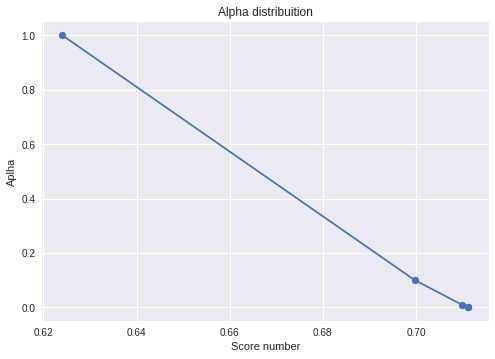

In [17]:
plt.title('Alpha distribuition')
plt.scatter(score_ridge_nor, alpha_range)
plt.plot(score_ridge_nor, alpha_range)
plt.xlabel('Score number')
plt.ylabel('Aplha')
plt.style.use('seaborn')
plt.show()

### *Unnormalized*

In [10]:
alpha_range = np.logspace(-4, 0, 5)
score_ridge_unnor = []

for alpha in alpha_range:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    score_ridge_unnor.append(r2_score(y_test, ridge_pred))

In [11]:
alpha_range

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [12]:
score_ridge_unnor

[0.7112250981524468,
 0.7112169289517228,
 0.7111351633163308,
 0.7103178206391327,
 0.7041586727559435]

### Plotting alpha distribuition:

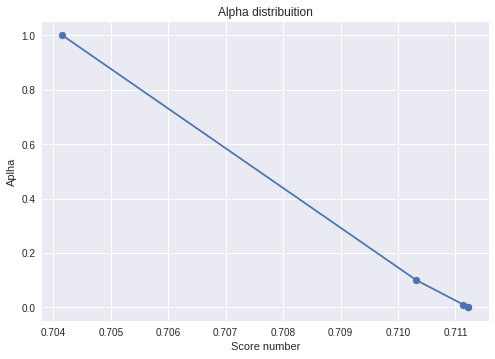

In [16]:
plt.title('Alpha distribuition')
plt.scatter(score_ridge_unnor, alpha_range)
plt.plot(score_ridge_unnor, alpha_range)
plt.xlabel('Score number')
plt.ylabel('Aplha')
plt.style.use('seaborn')
plt.show()

### *Selecting the best hyperparameters to make a model and rate it to see the difference between the score of the previous hyperparameters.*
- The best parameter is when alpha = `1` and normalize = `True`.

In [14]:
ridge_final = Ridge(alpha=1, normalize=True, max_iter = 10)
ridge_final.fit(X_train, y_train)
ridge_pred_final = ridge_final.predict(X_test)
print(f'The R2 score is: {r2_score(y_test, ridge_pred_final)}')

The R2 score is: 0.6241064474736235
